# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Изучение данных

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.shape

(5000, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [7]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [8]:
data.duplicated().sum()

153

In [9]:
data = data.drop_duplicates()

In [10]:
data.shape

(4847, 5)

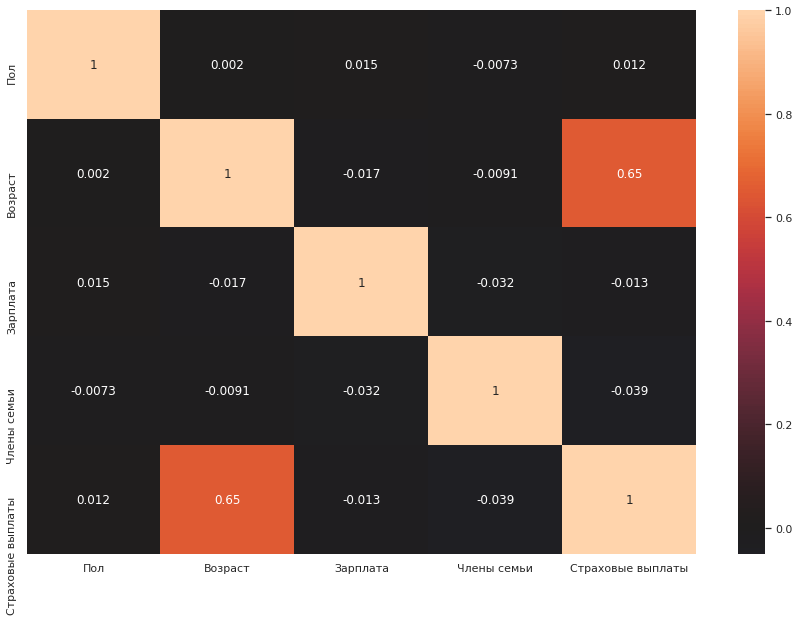

In [11]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data.corr(), annot = True, vmin=-0.05, vmax=1, center=0)
plt.show();

**Вывод: пропусков в датасете нет, но присутствовали дубликаты от которых мы избавились. Выбросов в данных не оказалось. После рассмотрения матрицы корреляции, можно сделать вывод о достаточно высокой связи между страховыми выплатами и возрастом клиентов.**

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

### Выделим признаки и целевые значения

In [12]:
features = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']

### Разделим данные на тренировочную и тестовую выборки

In [13]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.25, random_state=123)

**Проверим правильность разбиения**

In [14]:
print(round(((len(features_train)/len(features))*100)))
print(round(((len(features_test)/len(features))*100)))

75
25


### Обучим модель линейной регресии

In [15]:
model = LinearRegression()
model.fit(features_train,target_train)
predictions = model.predict(features_test)
print('Качество модели из sklearn: ', round(r2_score(target_test,predictions),2))

Качество модели из sklearn:  0.41


### Создание рандомной матрицы и её проверка на обратимость

In [16]:
matrix = np.random.rand(4,4)
matrix

array([[0.60310313, 0.34909665, 0.02765406, 0.82324486],
       [0.30246379, 0.64015623, 0.82904073, 0.20163426],
       [0.18355876, 0.01123314, 0.75553789, 0.02757659],
       [0.09145013, 0.65564822, 0.68169253, 0.71304698]])

In [17]:
np.linalg.inv(matrix)

array([[ 1.26081899,  1.14072456,  0.31767749, -1.7905305 ],
       [-0.32262329,  1.84908038, -1.94948926, -0.07500168],
       [-0.3175261 , -0.2458122 ,  1.25522492,  0.38756361],
       [ 0.43851317, -1.61153101,  0.55178701,  1.33051506]])

### Умножение признаков на обратимую матрицу (преобразование данных)

**Признаки тренировочных данных**

In [18]:
features_train_matrix = features_train @ matrix
features_train_matrix.head()

,0,1,2,3
4954,5678.106415,360.562789,23363.383441,856.862421
1992,4268.727442,283.045292,17557.200877,647.856956
610,6359.480700,406.330932,26163.728201,961.440274
3674,5451.787768,370.619249,22412.862729,828.986785
3522,5955.348964,380.977868,24500.715792,900.570137


**Признаки тестовых данных**

In [19]:
features_test_matrix = features_test @ matrix
features_test_matrix.head()

,0,1,2,3
1812,8469.316151,532.280273,34848.563478,1276.540083
193,8010.118611,504.488483,32960.520129,1206.976993
4495,7885.348494,504.962808,32442.273784,1190.806037
552,8781.761781,553.603631,36136.119059,1323.914994
3027,5700.091857,369.367978,23448.885720,862.039691


### Повторное обучение модели линейной регресии на преобразованных данных

In [20]:
model = LinearRegression()
model.fit(features_train_matrix,target_train)
predictions = model.predict(features_test_matrix)
print('Качество модели после изменения признаков: ', round(r2_score(target_test,predictions),2))

Качество модели после изменения признаков:  0.41


$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} P^TX^T y
$$
$$
w' = ((X^T X) P)^{-1}(P^T)^{-1} P^TX^T y
$$
$$
w' = ((X^T X) P)^{-1}X^T y
$$
$$
w' = P^{-1}(X^T X)^{-1}X^T y
$$
$$
w' = P^{-1}w
$$
Подставим в равенство
$$
Xw = XPP^{-1}w
$$
получаем единичную матрицу
$$
Xw = Xw
$$

## Алгоритм преобразования

**Алгоритм**

Шаг 1. Создание рандомной матрицы и её проверка на обратимость.

Шаг 2. Перемножение признаков на полученную матрицу.

Шаг 3. Применение матричных операции.

Шаг 4. Проверка метрики качетсва модели до и после преобразования.

## Проверка алгоритма

**Шаг 1. Создание рандомной матрицы и её проверка на обратимость**

In [21]:
random_matrix = np.random.rand(4,4)
random_matrix

array([[0.65696533, 0.69570727, 0.2599879 , 0.4633451 ],
       [0.83422553, 0.93781219, 0.26883593, 0.5293603 ],
       [0.14100496, 0.66481102, 0.71209438, 0.09595534],
       [0.26913511, 0.08835338, 0.04924638, 0.78224496]])

In [22]:
np.linalg.inv(random_matrix)

array([[ 16.34424731, -10.64002417,  -1.79407591,  -2.26076156],
       [-15.25918467,  11.44907237,   1.16949038,   1.14716648],
       [ 11.63376764,  -8.97716229,   0.60750216,  -0.8904998 ],
       [ -4.63222067,   2.93275476,   0.44692281,   1.98268862]])

**Шаг 2. Перемножение признаков на полученную матрицу**

**Признаки тренировочных данных**

In [23]:
ftr_rm = features_train @ random_matrix
ftr_rm.head()

,0,1,2,3
4954,4374.006881,20561.505194,22009.142355,2976.389611
1992,3299.382763,15454.740232,16529.559731,2245.197383
610,4900.822458,23026.779099,24645.544981,3335.316779
3674,4223.623060,19734.432894,21094.115002,2871.973814
3522,4589.777322,21563.257037,23078.668506,3123.685660


**Признаки тестовых данных**

In [24]:
fts_rm = features_test @ random_matrix
fts_rm.head()

,0,1,2,3
1812,6519.338540,30669.115715,32833.725369,4435.650676
193,6167.003403,29007.330264,31053.498263,4195.828328
4495,6078.579773,28553.304647,30558.307473,4135.794155
552,6761.161817,31801.500536,34044.881584,4600.681743
3027,4398.118084,20639.240043,22083.577825,2992.337469


**Шаг 3. Применение матричной операции.**

In [25]:
class LinearReg:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

**Шаг 4. Проверка метрики качетсва модели до и после преобразования.**

In [26]:
model_m = LinearReg()
model_m.fit(ftr_rm,target_train)
predictions = model_m.predict(fts_rm)
print('Качество матричной модели',round(r2_score(target_test, predictions),2))

Качество матричной модели 0.41


**Вывод: ранее мы уже получали показание метрики модели до преобразования, она равнялась 0,41. После проведения повторного эксперимента результат не изменился, что доказывает гипотезу о получении равных по значению показателей до и после преобразования.**